<a href="https://colab.research.google.com/github/coderhetal/MNIST-Handwritten-digits-classification/blob/main/MNIST_NN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


MAKING A FULLY CONNECTED NEURAL NETWORK ::


# Importing the libraries :

In [2]:
import torch
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F # All functions that don't have any parameters
from torch.utils.data import DataLoader # Gives easier dataset managment and creates mini batches
import torchvision.datasets as datasets # Has standard datasets we can import in a nice and easy way
import torchvision.transforms as transforms # Transformations we can perform on our dataset

# Creating data loader

In [3]:
batch_size = 64
# minibatch size selected is 64
train_dataset = datasets.MNIST(
    root="dataset/",
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)
train_loader = DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)
test_dataset = datasets.MNIST(
    root="dataset/",
    train=False,
    transform=transforms.ToTensor(),
    download=True,
)
test_loader = DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 293224470.65it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 3957906.74it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 133534617.92it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 22679200.91it/s]


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [4]:
import matplotlib.pyplot as plt


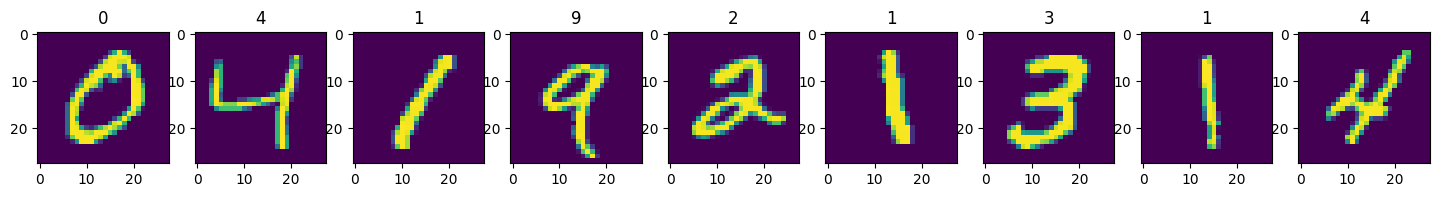

In [12]:
# visualize data
# this shows coloured images due to the imshow as it maps the grayscaled images to the color map
fig=plt.figure(figsize=(20, 10))
for i in range(1, 10):
    img = transforms.ToPILImage(mode='L')(train_dataset[i][0])
    fig.add_subplot(1, 10, i)
    plt.title(train_dataset[i][1])
    plt.imshow(img)
    #if want to the the original grayscaled images use this :
    #plt.imshow(img, cmap='gray')

plt.show()


# Model

In [15]:

class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)#hidden layer
        # hidden layer of 50 nodes
        self.fc2 = nn.Linear(50, num_classes)# output layer

    def forward(self, x): #784
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


#super(NN, self).__init__() is a way to invoke the initialization method
#of the parent class within the subclass constructor, ensuring proper initialization and inheritance

# Setting device

In [16]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size =784
 # 28x28 = 784, size of MNIST images (grayscale)
num_classes = 10
learning_rate = 0.001
num_epochs = 5

# Initializing the parameters :

In [17]:

model = NN(input_size=input_size, num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
costs=[]
acc_list=[]

print(f'Batch size  {batch_size}')
total_step=len(train_loader)
print(f'total train data batches  {total_step}')
m=batch_size*total_step
print(f'total training data  {m}')
total_test_batches=len(test_loader)
print(f'total test data batches  {total_test_batches}')
t=batch_size*total_test_batches
print(f'total test data   {t}')
print(f'total dataset size  {t+m}')



#determines the number of mini-batches to iterate over the entire training dataset once. (iterations in 1 epoch )

Batch size  64
total train data batches  938
total training data  60032
total test data batches  157
total test data   10048
total dataset size  70080


# Training and finding accuracy for training data

In [20]:
for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1}")
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Get to correct shape, 28x28->784
        # -1 will flatten all outer dimensions into one
        data = data.reshape(data.shape[0], -1)

        # forward propagation
        scores = model(data)
        loss = criterion(scores, targets)
        costs.append(loss.item())

        # zero previous gradients
        optimizer.zero_grad()

        # back-propagation
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

        # tracking accuracy
        total=targets.size(0)
        _, predictions = torch.max(scores.data,1)
         #finds the maximum value along dimension 1
         #returns two values: the maximum values and their corresponding indices

        num_correct = (predictions == targets).sum().item()
        #creates a boolean tensor
        #sums all the true ones and gives a scaler value for it
        acc_list.append(num_correct/total)



        if (batch_idx + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, batch_idx + 1, total_step, loss.item(),
                          (num_correct / total) * 100))

Epoch: 1
Epoch [1/5], Step [100/938], Loss: 0.0837, Accuracy: 96.88%
Epoch [1/5], Step [200/938], Loss: 0.0995, Accuracy: 95.31%
Epoch [1/5], Step [300/938], Loss: 0.1183, Accuracy: 95.31%
Epoch [1/5], Step [400/938], Loss: 0.0968, Accuracy: 93.75%
Epoch [1/5], Step [500/938], Loss: 0.0720, Accuracy: 98.44%
Epoch [1/5], Step [600/938], Loss: 0.0759, Accuracy: 96.88%
Epoch [1/5], Step [700/938], Loss: 0.0733, Accuracy: 96.88%
Epoch [1/5], Step [800/938], Loss: 0.0738, Accuracy: 98.44%
Epoch [1/5], Step [900/938], Loss: 0.0246, Accuracy: 100.00%
Epoch: 2
Epoch [2/5], Step [100/938], Loss: 0.1136, Accuracy: 96.88%
Epoch [2/5], Step [200/938], Loss: 0.0656, Accuracy: 98.44%
Epoch [2/5], Step [300/938], Loss: 0.0348, Accuracy: 98.44%
Epoch [2/5], Step [400/938], Loss: 0.1018, Accuracy: 96.88%
Epoch [2/5], Step [500/938], Loss: 0.1155, Accuracy: 95.31%
Epoch [2/5], Step [600/938], Loss: 0.1076, Accuracy: 96.88%
Epoch [2/5], Step [700/938], Loss: 0.0509, Accuracy: 98.44%
Epoch [2/5], Step [80

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss and accuracy for training data

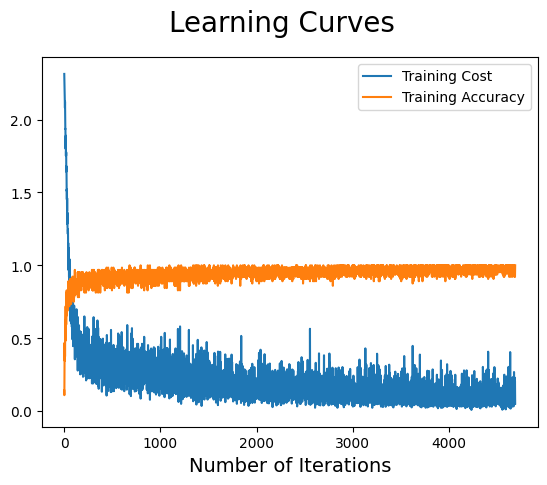

In [ ]:
fig = plt.figure()
fig.suptitle('Learning Curves', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.plot(costs, label = 'Training Cost')
plt.plot(acc_list, label = 'Training Accuracy')
plt.legend()
plt.savefig('CNN.png')

In [ ]:
import numpy as np

# Accuracy for test data :

In [ ]:
model.eval()
for i, (images, targets) in enumerate(test_loader):
    images = images.to(device=device)
    targets= targets.to(device=device)
    images =  images.reshape( images.shape[0], -1)
    outputs = model(images)
    loss = criterion(outputs, targets)
    costs.append(loss.item())
    total = targets.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted ==targets).sum().item()
    acc_list.append(correct / total)
acc = np.mean(np.array(acc_list))
print("Accuracy over Test set is : ",100*acc)

Accuracy over Test set is :  94.75957697088067
